### What are we Trying to Do
#### Basically we are Trying to make a linear regression model of our own without the use of any scikit learn , tensorflow or other things 



### what is basically linear regression ?? 
#### A) Linear regression is basically a line which is plotted such that for any value of given x(input) it will give me the value of the y(input)

### suppose we have an eq:
###        y=wX+b

### where w -- is my weight(slope) (how much y is affected when x is changed)
###      b -- is my bias(intecept)    ( value when x - 0)

In [29]:
import numpy as np
import matplotlib.pyplot as plt

Let us create some data on which we will be working on 

we will be working with the eq: y = 3x + 4 

In [30]:
# Here I created a seed where im randomising the value of x from 2 to 100 and the y value also from 2 to 100 but with some noise 
np.random.seed(32)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

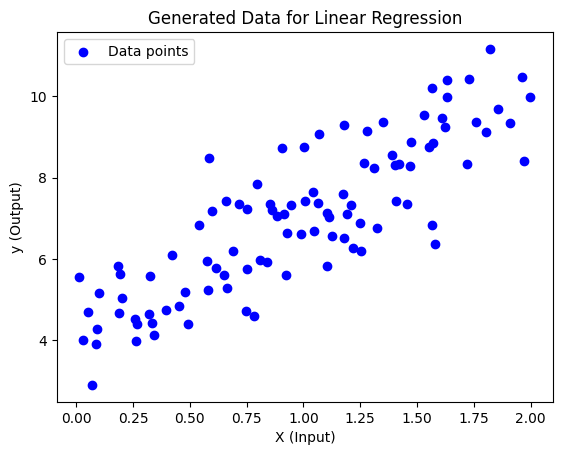

In [31]:
# these are my datapoints using matplotlib im getting the eda for the graph 
plt.scatter(X, y, color='blue', label='Data points')
plt.xlabel("X (Input)")
plt.ylabel("y (Output)")
plt.title("Generated Data for Linear Regression")
plt.legend()
plt.show()

#### Before making the model we are trying to randomize the total bias and weight 

In [32]:
# Initialize parameters randomly
w = np.random.randn(1)  
b = np.random.randn(1)  


### This is called the cost function or the mean square error where it gives us the difference between the prd value vs the actually value given by the machine
<img>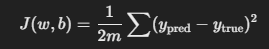</img>

In [33]:
# Defining the cost functions(root mean square value)
def compute_cost(x, y, w, b):
    m = len(y)  # Number of data points
    y_pred = x * w + b  # Compute predictions
    cost = (1 / (2 * m)) * np.sum((y_pred - y) ** 2)  # Calculate mean squared error
    return cost


### Okay how this cost function works 
#### here we have a y_pred which will be genrerated 
#### We square the differences (to remove negative values).
#### We sum them and divide by 2m to get the average cost.

In [34]:
def gradient_descent(X, y, w, b, learning_rate, epochs):
    m = len(y)  # Number of data points
    cost_history = []  # To store cost at each step

    for i in range(epochs):
        # Compute predictions
        y_pred = X * w + b

        # Compute gradients (derivatives)
        dw = (1 / m) * np.sum((y_pred - y) * X)  # Gradient of w
        db = (1 / m) * np.sum(y_pred - y)  # Gradient of b

        # Update parameters
        w -= learning_rate * dw
        b -= learning_rate * db

        # Compute and store cost
        cost = compute_cost(X, y, w, b)
        cost_history.append(cost)

        # Print cost every 10 iterations
        if i % 10 == 0:
            print(f"Epoch {i}, Cost: {cost:.4f}")

    return w, b, cost_history


GRADIENT DESCEND 

In [35]:
learning_rate = 0.1  # Controls how big the update steps are
epochs = 100  # Number of times we update w and b

# Train the model
w_final, b_final, cost_history = gradient_descent(X, y, w, b, learning_rate, epochs)

print(f"Final weight (slope): {w_final}")
print(f"Final bias (intercept): {b_final}")


Epoch 0, Cost: 8.2082
Epoch 10, Cost: 1.0464
Epoch 20, Cost: 0.8610
Epoch 30, Cost: 0.7675
Epoch 40, Cost: 0.6969
Epoch 50, Cost: 0.6433
Epoch 60, Cost: 0.6026
Epoch 70, Cost: 0.5717
Epoch 80, Cost: 0.5482
Epoch 90, Cost: 0.5304
Final weight (slope): [3.45594076]
Final bias (intercept): [3.56649776]


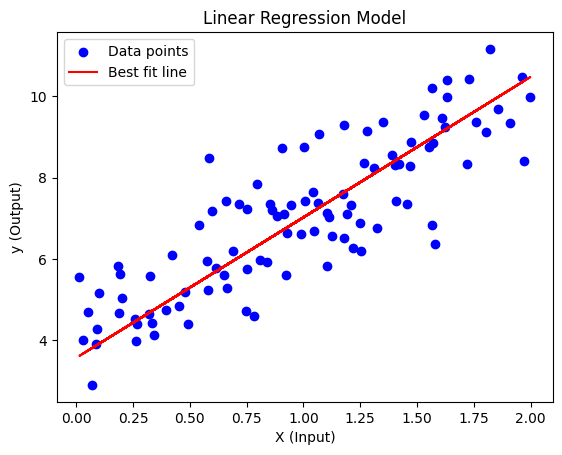

In [36]:
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, X * w_final + b_final, color='red', label='Best fit line')
plt.xlabel("X (Input)")
plt.ylabel("y (Output)")
plt.title("Linear Regression Model")
plt.legend()
plt.show()


In [37]:
def predict(X, w, b):
    return X * w + b



X_user = float(input("Enter a value for X: ")) 
X_new = np.array([[X_user]])
y_pred = predict(X_new, w_final, b_final)
print(f"Prediction for X = {X_user}: {y_pred[0][0]}")

Prediction for X = 2.0: 10.4783792870899


In [38]:
# Prediction for X = 2.0: 10.4783792870899


In [39]:
import pickle

# Save w and b
model_params = {"w": w, "b": b}
with open("model.pkl", "wb") as file:
    pickle.dump(model_params, file)

print("Model parameters saved!")


Model parameters saved!
